# Dataset Creation
Pollutant data for the city of Delhi is sourced from [this](https://aqicn.org/data-platform/covid19/) real-time World Air Quality Index.

In [2]:
#Importing libraries needed
import pandas as pd

In [72]:
data2020 = pd.read_csv('waqi-covid19-airqualitydata-2020.csv')

In [73]:
data2020.shape

(1041823, 9)

In [74]:
data2020.head()

,Date,Country,City,Specie,Count,Min,Max,Median,Variance
0,28-02-2020,AT,Salzburg,co,18,0.1,0.1,0.1,0.0
1,06-03-2020,AT,Salzburg,co,20,0.1,0.1,0.1,0.0
2,08-03-2020,AT,Salzburg,co,19,0.1,0.1,0.1,0.0
3,12-05-2020,AT,Salzburg,co,5,0.1,0.1,0.1,0.0
4,18-05-2020,AT,Salzburg,co,18,0.1,0.1,0.1,0.0


First, we have to merge the datasets for each quarter of 2019 to get one entire dataset for 2019. Then we will check to see if visualizations are possible. Later, a final dataset will merge the data for 2019 and 2020. 

In [23]:
file1 = pd.read_csv('waqi-covid19-airqualitydata-2019Q1.csv')

In [21]:
file1.head()

,Date,Country,City,Specie,Count,Min,Max,Median,Variance
0,16-01-2019,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40
1,22-01-2019,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75
2,26-01-2019,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96
3,07-01-2019,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88
4,10-01-2019,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97


In [47]:
file2 = pd.read_csv('waqi-covid19-airqualitydata-2019Q2.csv')
file3 = pd.read_csv('waqi-covid19-airqualitydata-2019Q3.csv')
file4 = pd.read_csv('waqi-covid19-airqualitydata-2019Q4.csv')

In [48]:
data2019 = pd.concat([file1,file2], ignore_index= True)

In [50]:
data2019 = pd.concat([data2019, file3], ignore_index = True)

In [51]:
data2019 = pd.concat([data2019, file4], ignore_index = True)

In [62]:
data2019.shape

(2174897, 9)

In [63]:
data2019.to_csv('2019.csv', index = False)

In [81]:
# Let us see if the time-series data for 2019 is ok by plotting it. We can tell if there are any missing dates
import numpy as np
from matplotlib import pyplot as plt  
import seaborn as sns

In [58]:
df = data2019.loc[(data2019['Specie'] == 'pm25')&(data2019['City'] == 'Delhi')]

In [60]:
df.Date  = pd.to_datetime(df.Date, dayfirst = True)

C:\Users\Anantk\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [66]:
df = df.sort_values(['Date'])

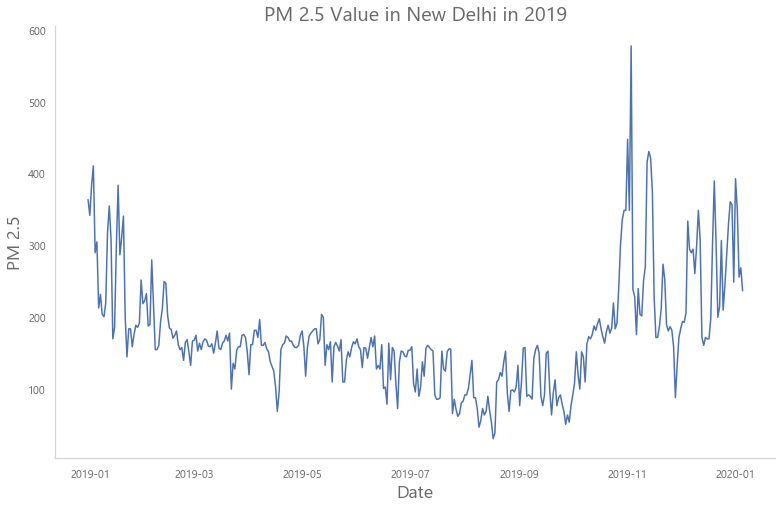

In [71]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_axes([0,0,1,1])
ax.set_title('PM 2.5 Value in New Delhi in 2019')
ax.plot(df.Date, df.Median)
ax.set_xlabel('Date')
ax.set_ylabel('PM 2.5')
plt.show()

Great, seems like there are no problems with the merged dataset for 2019. Now, let us merge data2020 with data2019 to get a final dataset. 

In [75]:
final_dataset = pd.concat([data2019,data2020], ignore_index= True)

In [76]:
final_dataset.shape

(3216720, 9)

In [77]:
final_dataset.head()

,Date,Country,City,Specie,Count,Min,Max,Median,Variance
0,16-01-2019,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40
1,22-01-2019,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75
2,26-01-2019,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96
3,07-01-2019,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88
4,10-01-2019,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97


In [78]:
#convert to the friendlier Pandas datetime format
final_dataset.Date  = pd.to_datetime(final_dataset.Date, dayfirst = True)

In [79]:
final_dataset.head()

,Date,Country,City,Specie,Count,Min,Max,Median,Variance
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97


In [80]:
final_dataset.to_csv('final_dataset.csv', index = False)